In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [30]:
#Task 1
df = pd.read_csv('F:\\IUT-Files\\Machine Learning\\Lab 2\\house_price_data.txt')


In [31]:
#Task 2
df.columns = ['size', 'bedrooms', 'price']

colors = {}

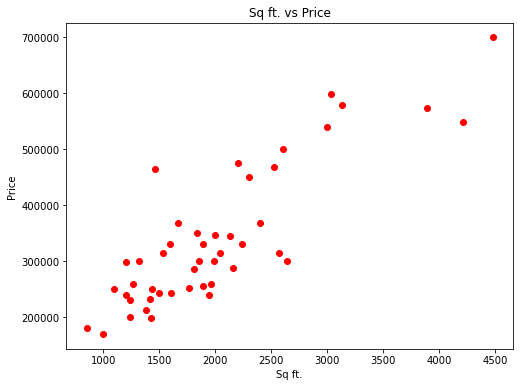

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(df['size'], df['price'], c='red')
plt.title('Sq ft. vs Price')
plt.xlabel('Sq ft.')
plt.ylabel('Price')
plt.show()

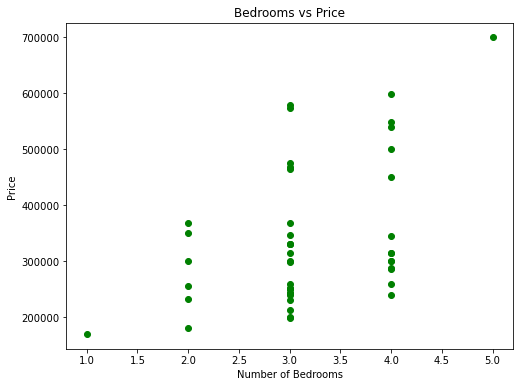

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(df['bedrooms'], df['price'], c='green')
plt.title('Bedrooms vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

In [34]:
#Task 3

df.agg(['mean', 'median', 'std', 'var'])

,size,bedrooms,price
mean,1998.434783,3.173913,3.391195e+05
median,1870.000000,3.000000,2.999000e+05
std,803.333019,0.768963,1.261034e+05
var,645343.940097,0.591304,1.590207e+10


In [126]:
#Task 4

min_val = df.min()
max_val = df.max()

df_normalized = (df - min_val) / (max_val - min_val)
df_normalized.columns = df.columns
#df_normalized

In [127]:
#Task 5
df = df_normalized.sample(frac=1, random_state=42)
test_samples = int(len(df) * 0.2)
training_df = df_normalized[:-test_samples]
testing_df = df_normalized[-test_samples:]

x_train = training_df[['size', 'bedrooms']]
y_train = training_df['price']

x_test = testing_df[['size', 'bedrooms']]
y_test = testing_df['price']

In [128]:
x_train = x_train.values
x_train

array([[0.36127965, 0.75      ],
       [0.42691671, 0.5       ],
       [0.47297297, 0.75      ],
       [0.26447876, 0.75      ],
       [0.31660232, 0.5       ],
       [1.        , 1.        ],
       [0.35300607, 0.75      ],
       [0.1555433 , 0.25      ],
       [0.17705461, 0.5       ],
       [0.49227799, 0.5       ],
       [0.10672918, 0.5       ],
       [0.38223938, 0.5       ],
       [0.46166575, 0.5       ],
       [0.        , 0.25      ],
       [0.11472697, 0.5       ],
       [0.10590182, 0.5       ],
       [0.48455598, 0.75      ],
       [0.25234418, 0.5       ],
       [0.27578599, 0.75      ],
       [0.39933811, 0.75      ],
       [0.37175951, 0.5       ],
       [0.32763376, 0.75      ],
       [0.06839493, 0.5       ],
       [0.09680088, 0.5       ],
       [0.28571429, 0.25      ],
       [0.16712631, 0.5       ],
       [0.145615  , 0.5       ],
       [0.04081633, 0.        ],
       [0.83783784, 0.5       ],
       [0.27220077, 0.25      ],
       [0.

In [129]:
y_train = y_train.values
y_train

array([0.2209434 , 0.37566038, 0.27188679, 0.21886792, 0.33415094,
       1.        , 0.33037736, 0.11716981, 0.13698113, 0.24528302,
       0.11320755, 0.30188679, 0.56433962, 0.01886792, 0.16981132,
       0.05660377, 0.62282642, 0.15660377, 0.24528302, 0.52830189,
       0.57566038, 0.27358491, 0.1509434 , 0.13132075, 0.16056604,
       0.55584906, 0.07943396, 0.        , 0.76226415, 0.33962264,
       0.71528302, 0.13773585, 0.27358491, 0.30188679, 0.37471698,
       0.05490377, 0.24528302])

In [130]:
x_test = x_test.values
x_test

array([[0.28626586, 0.5       ],
       [0.59238831, 0.75      ],
       [0.60093767, 0.75      ],
       [0.30612245, 0.75      ],
       [0.63017099, 0.5       ],
       [0.09597352, 0.5       ],
       [0.12906784, 0.25      ],
       [0.1613348 , 0.5       ],
       [0.30005516, 0.75      ]])

In [131]:
y_test = y_test.values
y_test

array([0.30207358, 0.69811321, 0.80962264, 0.16981132, 0.77358491,
       0.24358491, 0.24528302, 0.1509434 , 0.13226226])

In [132]:
#Task 6
def hypothesis(theta, X):
    return np.dot(X, theta)

In [133]:
def MSE(y1, y):
    M = 0
    
    for i in range(len(y)):
        M += (y1[i] - y[i])**2
        
    M += M/len(y)
    return M

def MAE(y1, y):
    M = 0
    
    for i in range(len(y)):
        M += abs(y[i] - y1[i])
        
    M+= M/len(y)
    return M

In [134]:
#Task 7
def cost_function(x, theta, y):
    m = len(y)
    h = hypothesis(theta, x)
    J = np.sum( (h - y) ** 2) / (2 * m)
    return J

In [135]:
#Task 8
def gradient_descent(theta, X, y, alpha, num_iterations):
    m = len(y)
    J_history = []

    for i in range(num_iterations):
        h = hypothesis(theta, X)
        #print(h)
        gradient = (1 / m) * np.dot(X.T, (h - y))
        theta -= alpha * gradient
        J_history.append(cost_function(X, theta, y))

    return theta, J_history

In [151]:
#Task 9
x_train_extended = np.column_stack((np.ones((x_train.shape[0])), x_train))
theta = np.zeros(x_train_extended.shape[1])

theta, J = gradient_descent(theta, x_train_extended, y_train, 0.01, 50)

print("Cost: ", J)
print("Parameters: ", theta)

Cost:  [0.06906436295438802, 0.06768607612442921, 0.06634573140834561, 0.06504227550757584, 0.06377468437277174, 0.06254196239156315, 0.06134314159887803, 0.060177280909191555, 0.059043465370095416, 0.05794080543659483, 0.056868436265558334, 0.05582551702975989, 0.05481123025097015, 0.05382478115156706, 0.05286539702415209, 0.051932326618671885, 0.05102483954655917, 0.05014222570142042, 0.04928379469581066, 0.048448875313648804, 0.04763681497783914, 0.04684697923267662, 0.04607875124062559, 0.04533153129307256, 0.04460473633466536, 0.04389779950086085, 0.04321016966831498, 0.042541311017758085, 0.041890702609009005, 0.04125783796779079, 0.040642224684020366, 0.04004338402125349, 0.03946085053697514, 0.03889417171343432, 0.038342907598730436, 0.037806630457866384, 0.03728492443349179, 0.03677738521606724, 0.03628361972318792, 0.0358032457878121, 0.03533589185514761, 0.03488119668795539, 0.034438809080036735, 0.03400838757767684, 0.03358960020882364, 0.03318212421978735, 0.03278564581925

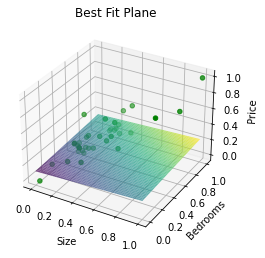

In [155]:
#Task 10

size = x_train_extended[:, 1]
bedrooms = x_train_extended[:, 2]
price = y_train

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(size, bedrooms, price, c='g', marker='o')

size_range = np.linspace(min(size), max(size), 200)
bedroom_range = np.linspace(min(bedrooms), max(bedrooms), 200)
size_grid, bedroom_grid = np.meshgrid(size_range, bedroom_range)

plot_X = np.column_stack((np.ones(size_grid.ravel().shape[0]), size_grid.ravel(), bedroom_grid.ravel()))

predictions = np.dot(plot_X, theta)
predictions = predictions.reshape(size_grid.shape)

ax.plot_surface(size_grid, bedroom_grid, predictions, cmap='viridis', alpha=0.7)

ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Best Fit Plane')

plt.show()


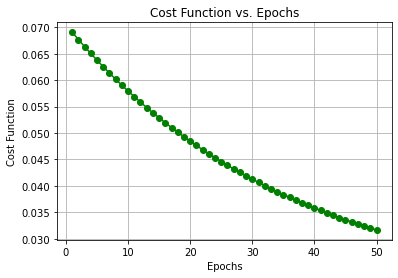

In [157]:
#Task 11

epochs = list(range(1, len(J)+1))

plt.plot(epochs, J, marker='o', linestyle='-', c='g')

plt.xlabel('Epochs')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Epochs')
plt.grid(True)
plt.show()

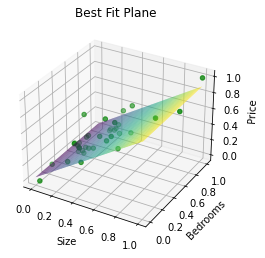

In [168]:
#Task 12

size = x_train[:, 0]
bedrooms = x_train[:, 1]
price = y_train

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(size, bedrooms, price, c='g', marker='o')

size_range = np.linspace(min(size), max(size), 200)
bedroom_range = np.linspace(min(bedrooms), max(bedrooms), 200)
size_grid, bedroom_grid = np.meshgrid(size_range, bedroom_range)

plot_X = np.column_stack((size_grid.ravel(), bedroom_grid.ravel()))

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_train)

predictions = model.predict(plot_X)
predictions = predictions.reshape(size_grid.shape)

ax.plot_surface(size_grid, bedroom_grid, predictions, cmap='viridis', alpha=0.7)

ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Best Fit Plane')

plt.show()